In [412]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [413]:
df = pd.DataFrame()

In [414]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [415]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

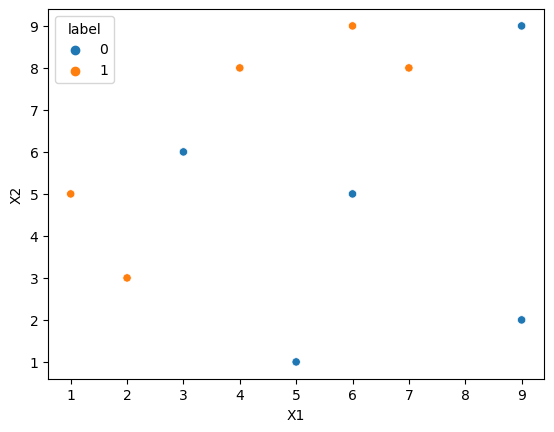

In [416]:
sns.scatterplot(data = df, x = df['X1'], y = df['X2'], hue = df['label']) 

In [417]:
df['weights'] = 1 / df.shape[0]

In [418]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [419]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [420]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [421]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

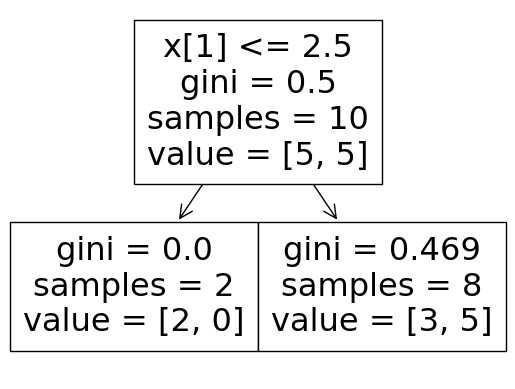

In [422]:
plot_tree(dt1)

<Axes: >

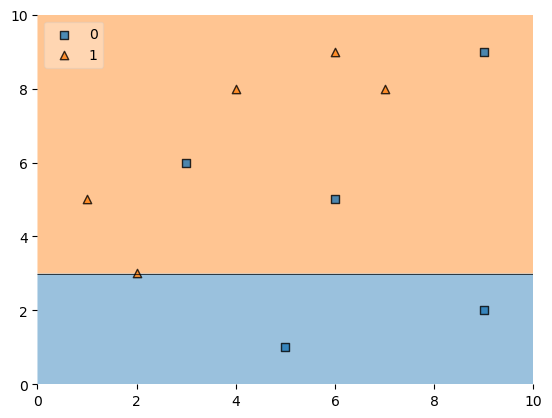

In [423]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [424]:
df['y_pred'] = dt1.predict(X)

In [425]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [426]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [427]:
# calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [428]:
# update weights
def update_row_weights(row, alpha=0.432):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [429]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [430]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.064921
1,2,3,1,0.1,1,0.064921
2,3,6,0,0.1,1,0.154034
3,4,8,1,0.1,1,0.064921
4,5,1,0,0.1,0,0.064921
5,6,9,1,0.1,1,0.064921
6,6,5,0,0.1,1,0.154034
7,7,8,1,0.1,1,0.064921
8,9,9,0,0.1,1,0.154034
9,9,2,0,0.1,0,0.064921


In [431]:
df['updated_weights'].sum()

0.9165470982279413

In [432]:
df['normalized_weigths'] = df['updated_weights'] / df['updated_weights'].sum()

In [433]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weigths
0,1,5,1,0.1,1,0.064921,0.070832
1,2,3,1,0.1,1,0.064921,0.070832
2,3,6,0,0.1,1,0.154034,0.168058
3,4,8,1,0.1,1,0.064921,0.070832
4,5,1,0,0.1,0,0.064921,0.070832
5,6,9,1,0.1,1,0.064921,0.070832
6,6,5,0,0.1,1,0.154034,0.168058
7,7,8,1,0.1,1,0.064921,0.070832
8,9,9,0,0.1,1,0.154034,0.168058
9,9,2,0,0.1,0,0.064921,0.070832


In [434]:
df['normalized_weigths'].sum()

0.9999999999999999

In [435]:
df['cumsum_upper'] = np.cumsum(df['normalized_weigths'])

In [436]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weigths']

In [437]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weigths,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.064921,0.070832,0.070832,0.000000
1,2,3,1,0.1,1,0.064921,0.070832,0.141664,0.070832
2,3,6,0,0.1,1,0.154034,0.168058,0.309723,0.141664
3,4,8,1,0.1,1,0.064921,0.070832,0.380555,0.309723
4,5,1,0,0.1,0,0.064921,0.070832,0.451387,0.380555
5,6,9,1,0.1,1,0.064921,0.070832,0.522219,0.451387
6,6,5,0,0.1,1,0.154034,0.168058,0.690277,0.522219
7,7,8,1,0.1,1,0.064921,0.070832,0.761109,0.690277
8,9,9,0,0.1,1,0.154034,0.168058,0.929168,0.761109
9,9,2,0,0.1,0,0.064921,0.070832,1.000000,0.929168


In [438]:
def create_new_dataset(df):
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    
    return indices

In [439]:
index_values = create_new_dataset(df)

In [440]:
index_values

[8, 8, 2, 2, 7, 9, 5, 4, 5, 8]

In [441]:
df2 = df.iloc[index_values, [0, 1, 2, 3]]

In [442]:
df2

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1


In [443]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [444]:
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [445]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

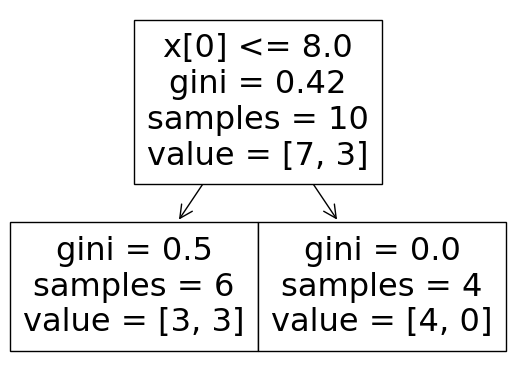

In [446]:
plot_tree(dt2)

<Axes: >

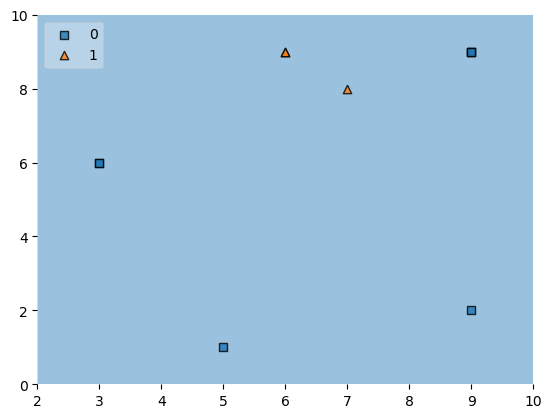

In [447]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [448]:
df2['y_pred'] = dt2.predict(X)

In [449]:
df2

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0


In [450]:
alpha2 = calculate_model_weight(0.3)

In [451]:
alpha2

0.42364893019360184

In [452]:
# update weights
def update_row_weights(row, alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [453]:
df2['updated_weights'] = df2.apply(update_row_weights, axis=1)

In [454]:
df2

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
8,9,9,0,0.1,0,0.033622


In [455]:
df2['normalized_weights'] = df2['updated_weights']/df['updated_weights'].sum()

In [456]:
df2

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.033622,0.036683
8,9,9,0,0.1,0,0.033622,0.036683
2,3,6,0,0.1,0,0.033622,0.036683
2,3,6,0,0.1,0,0.033622,0.036683
7,7,8,1,0.1,0,0.297427,0.324509
9,9,2,0,0.1,0,0.033622,0.036683
5,6,9,1,0.1,0,0.297427,0.324509
4,5,1,0,0.1,0,0.033622,0.036683
5,6,9,1,0.1,0,0.297427,0.324509
8,9,9,0,0.1,0,0.033622,0.036683


In [457]:
df['normalized_weigths'].sum()

0.9999999999999999

In [458]:
df2['cumsum_upper'] = np.cumsum(df2['normalized_weights'])

In [459]:
df2['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weigths']

In [460]:
df2

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
8,9,9,0,0.1,0,0.033622,0.036683,0.036683,0.761109
8,9,9,0,0.1,0,0.033622,0.036683,0.073366,0.761109
2,3,6,0,0.1,0,0.033622,0.036683,0.110049,0.141664
2,3,6,0,0.1,0,0.033622,0.036683,0.146732,0.141664
7,7,8,1,0.1,0,0.297427,0.324509,0.471240,0.690277
9,9,2,0,0.1,0,0.033622,0.036683,0.507923,0.929168
5,6,9,1,0.1,0,0.297427,0.324509,0.832432,0.451387
4,5,1,0,0.1,0,0.033622,0.036683,0.869115,0.380555
5,6,9,1,0.1,0,0.297427,0.324509,1.193623,0.451387
8,9,9,0,0.1,0,0.033622,0.036683,1.230306,0.761109


In [461]:
index_values = create_new_dataset(df)


In [462]:
df3 = df2.iloc[index_values,[0,1,2,3]]

In [463]:
df3

,X1,X2,label,weights
9,9,2,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1


In [464]:
dt3 = DecisionTreeClassifier(max_depth=1)
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [465]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

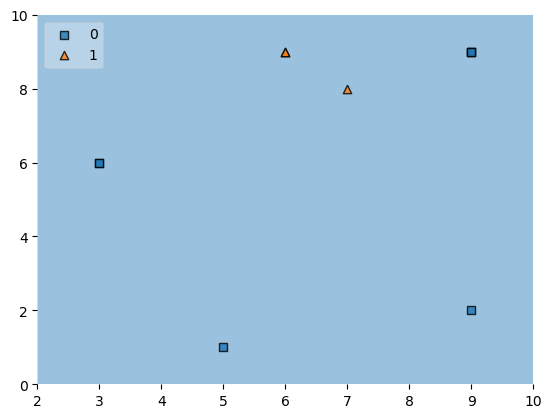

In [466]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [467]:
df3['y_pred'] = dt3.predict(X)

In [468]:
df3

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0


In [469]:
alpha3 = calculate_model_weight(0.6)

In [470]:
alpha3

-0.20273255405408214

In [471]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 0.42364893019360184 -0.20273255405408214


# Prediction

In [472]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [473]:
dt2.predict(query)

array([0], dtype=int64)

In [474]:
dt3.predict(query)

array([0], dtype=int64)

In [475]:
alpha1*1 + alpha2*1 + alpha3*1

0.6445653063331216

In [476]:
np.sign(0.64)

1.0